In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None)

In [2]:
# Cargamos el dataframe
df = pd.read_csv('datos/train.csv', index_col='id', parse_dates=['fecha'])
# coordenadas de las ciudades
ciudades = pd.read_csv('datos/ciudades.csv')

In [7]:
# valores medios de precios de propiedades por ciudad
precios_por_ciudad = df.groupby('ciudad').agg({'precio': 'mean'})\
    .sort_values('precio', ascending=False)

precios_por_ciudad = pd.merge(precios_por_ciudad, ciudades, on='ciudad', how='left')
precios_por_ciudad = precios_por_ciudad.dropna()

In [12]:
#nacho
from folium.plugins import HeatMap
# crea el mapa de Mexico usando valores de latitud y longitude
mexico_heatmap = folium.Map(location=[20, -102], zoom_start=5)

HeatMap(precios_por_ciudad[['lat', 'lng', 'precio']], radius=8, max_zoom=4).add_to(mexico_heatmap)
# Guarda el mapa
mexico_heatmap.save(outfile= "mapa.html")
# Mostrar el mapa
mexico_heatmap

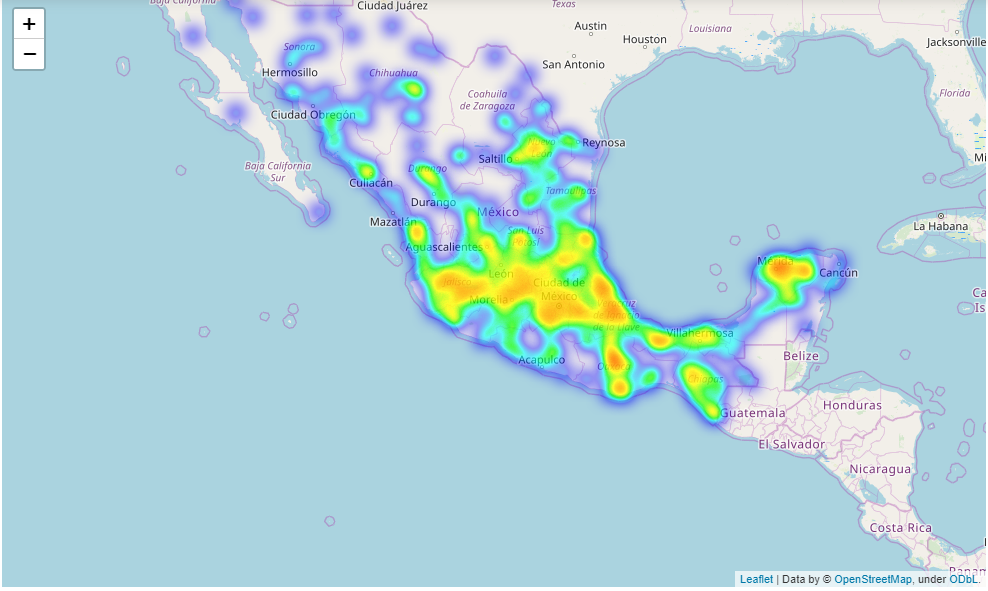

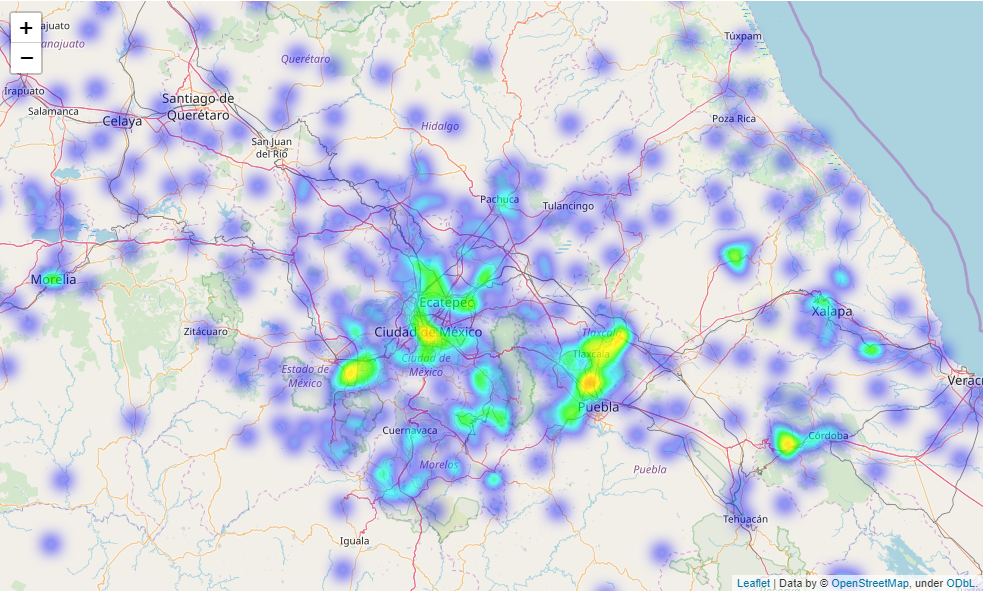